# New Questions

#### 1. What is the average purchase price of properties by “Level”? 
    • Level 0 -> Price between U$ 0 and U$ 321,950 
    • Level 1 -> Price between U$ 321,950 and U$ 450,000 
    • Level 2 -> Price between U$ 450,000 and U$ 645,000 
    • Level 3 -> Above U$ 645,000
#### 2. What is the average size of the living room of the properties by “Size”? 
    • Size 0 -> Size between 0 and 1427 sqft 
    • Size 1 -> Size between 1427 and 1910 sqft 
    • Size 2 -> Size between 1910 and 2550 sqft 
    • Size 3 -> Size over 2550 sqft
#### 3. Add the following information to the original dataset: 
    • Place ID: location 
    • OSM Type: Open Street Map type 
    • Country: Country Name 
    • Country Code: Country code
#### 4. Add the following filters to the Map: 
    • Minimum living room area size. 
    • Number minimum of bathrooms. 
    • Maximum Price Value. 
    • Maximum size of the basement area. 
    • Property Conditions Filter. 
    • Filter by Year of Construction.
#### 5. Add the following filters to the Dashboard: 
    • Filter by date available for purchase. 
    • Filter per year of renewal. 
    • Filter whether it has a water view or not.

## Import LIbraries

In [56]:
import defs
import time
import numpy as np
import pandas as pd

import seaborn        as sns
import ipywidgets     as widgets
import plotly.express as px

from ipywidgets           import interact, interactive, fixed, interact_manual
from matplotlib           import gridspec
from matplotlib           import pyplot as plt
from multiprocessing      import Pool
from geopy.geocoders      import Nominatim
from IPython.core.display import HTML





In [59]:
# Function for format all over the graphics
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [14, 7]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading data

In [60]:
data = pd.read_csv('datasets/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1. What is the average purchase price of properties by “Level”?
    • Level 0 -> Price between U$ 0 and U$ 321,950 
    • Level 1 -> Price between U$ 321,950 and U$ 450,000 
    • Level 2 -> Price between U$ 450,000 and U$ 645,000 
    • Level 3 -> Above U$ 645,000


In [61]:
# Creating new column "level" and attribuiting values to new column whit .apply comand.
data['level'] = data['price'].apply(lambda x:   'level_0' if (x >= 0) & (x <= 321950) else
                                                'level-1' if (x > 321950) & (x <= 450000) else 
                                                'level_2' if (x > 450000) & (x <= 645000) else 'level_3')
data[['price', 'level']].head()

,price,level
0,221900.0,level_0
1,538000.0,level_2
2,180000.0,level_0
3,604000.0,level_2
4,510000.0,level_2


## 2. What is the average size of the living room of the properties by “Size”?
    • Size 0 -> Size between 0 and 1427 sqft 
    • Size 1 -> Size between 1427 and 1910 sqft 
    • Size 2 -> Size between 1910 and 2550 sqft 
    • Size 3 -> Size over 2550 sqft


In [62]:
# Creating new column "level" and attribuiting values to new column whit .apply comand.
data['size'] = data['sqft_living'].apply(lambda x:   'size_0' if (x >= 0) & (x <= 1427) else
                                                'size_1' if (x > 1427) & (x <= 1910) else 
                                                'size_2' if (x > 1910) & (x <= 2550) else 'size_3')
data[['sqft_living', 'size']].head()

,sqft_living,size
0,1180,size_0
1,2570,size_3
2,770,size_0
3,1960,size_2
4,1680,size_1


## 3. Add the following information to the original dataset:
    • Place ID: location 
    • OSM Type: Open Street Map type 
    • Country: Country Name 
    • Country Code: Country code


In [63]:
#from geopy.geocoders import Nominatim

geolocator = Nominatim( user_agent='geopyExercises')

query = '47.5112, -122.257'
response = geolocator.reverse(query)

##### data[['lat', 'long']].head() # Len information about "lat" and long
##### response - show us information about latitud and longitud attibuited at query
##### response.raw - plot json information
##### response.raw[ ]
##### response.raw['place_id'] - plot key the json file
##### response.raw['address']['house_number'] #plot number of house

In [64]:
# Handling .Json file whit Multi_thread process
#import time
#from multiprocessing import Pool

In [65]:
data['query'] = data[['lat', 'long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)

In [66]:
# (Api request) geolocator = Nominatim( user_agent='geopyExercises')


#def get_data( x ):
#    index, row = x
#    time.sleep( 1 )
    
    # call the api
#    response = geolocator.reverse(row['query'])
    
#    try:
#        place_id = response.raw['place_id']
#        osm_type = response.raw['osm_type']
#        country = response.raw['address']['country'] # this informar are in other subpack
#        country_code = response.raw['address']['country_code'] # necessary declare the subfolder
#        
#        return place_id, osm_type, country, country_code

In [67]:
#import defs
# Creating dataframe only for multi_thread process
df1 = data[['id', 'query']].head()

p = Pool(3) # Select only 3 cors at the machine

start = time.process_time()
df1[['place_id','osm_type', 'country', 'country_code']] = p.map( defs.get_data, df1.iterrows() )
end = time.process_time()

print('Time Elapsed: {}', end - start)

Time Elapsed: {} 0.014897136000001865


In [68]:
df1.head()

,id,query,place_id,osm_type,country,country_code
0,7129300520,"47.5112,-122.257",148421265,way,NA,NA
1,6414100192,"47.721,-122.319",148033904,way,NA,NA
2,5631500400,"47.7379,-122.233",76736995,node,NA,NA
3,2487200875,"47.5208,-122.393",145042219,way,NA,NA
4,1954400510,"47.6168,-122.045",292831047,way,NA,NA


## 4. Add the following filters to the Map:
    • Minimum living room area size. 
    • Number minimum of bathrooms. 
    • Maximum Price Value. 
    • Maximum size of the basement area. 
    • Property Conditions Filter. 
    • Filter by Year of Construction.


In [69]:
#import ipywidgets as widgets
#from ipywidgets import interact, interactive, fixed, interact_manual
#from plotly import express as px

In [70]:
# First, created new column
#data['is_waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

# Define interactive buttons
price_limit = widgets.IntSlider(
    value = int( data['price'].mean()),
    min = int(data['price'].min()) ,
    max = int(data['price'].max()) ,
    step = 1,
    description = 'Maximunm Price',
    disable = False,
    style = {'description_width': 'initial'})

# Define interactive buttons
living_limit = widgets.IntSlider(
    value = int( data['sqft_living'].mean() ),
    min = data['sqft_living'].min() ,
    max = data['sqft_living'].max() ,
    step = 1,
    description = 'Minimum Living Room Size',
    disable = False,
    style = {'description_width': 'initial'})

# Define interactive buttons
bath_limit = widgets.IntSlider(
    value = data['bathrooms'].mean() ,
    min = data['bathrooms'].min() ,
    max = data['bathrooms'].max() ,
    step = 1,
    description = 'Minimum Bathrooms Values',
    disable = False,
    style = {'description_width': 'initial'})

# Define interactive buttons
basement_limit = widgets.IntSlider(
    value = int(data['sqft_basement'].mean()) ,
    min = data['sqft_basement'].min() ,
    max = data['sqft_basement'].max() ,
    step = 1,
    description = 'Maximum Basement',
    disable = False,
    style = {'description_width': 'initial'})

# Define interactive buttons
condition_limit = widgets.IntSlider(
    value = data['condition'].mean() ,
    min = data['condition'].min() ,
    max = data['condition'].max() ,
    step = 1,
    description = 'House Condition',
    disable = False,
    style = {'description_width': 'initial'})

# Define interactive buttons
yr_limit = widgets.IntSlider(
    value = data['yr_built'].mean() ,
    min = data['yr_built'].min() ,
    max = data['yr_built'].max() ,
    step = 1,
    description = 'Year Build Limit',
    disable = False,
    style = {'description_width': 'initial'})

In [71]:
def update_map(df, price_limit, living_limit, bath_limit, basement_limit):
    # Filter the data
    houses = df[(df['price'] < price_limit) &
                (df['sqft_living'] < living_limit) & 
                (df['bathrooms'] < bath_limit) &
                (df['sqft_basement'] < basement_limit) & 
                (df['condition'] == condition_limit ) &
                (df['yr_built'] == yr_limit)][['id', 'lat', 'long', 'price', 'sqft_living' ]].copy()
    
    # Plot Map
    fig = px.scatter_mapbox(houses,
                            lat= 'lat',
                            lon= 'long',
                            size= 'price',
                            color_continuous_scale=px.colors.cyclical.IceFire,
                            size_max=15,
                            zoom=10 )
    fig.update_layout( mapbox_style='open-street-map' )
    fig.update_layout( height=600, margin={'r':0, 'l':0, 't':0, 'b':0})
    fig.show()

In [73]:
widgets.interactive( update_map, df=fixed( data ), price_limit=price_limit,
                     living_limit=living_limit, 
                     bath_limit=bath_limit, 
                     basement_limit=basement_limit, 
                     condition_limit=condition_limit,
                     yr_limit=yr_limit)

interactive(children=(IntSlider(value=2251875, description='Maximunm Price', max=7700000, min=75000, style=Sli…

## 5. Add the following filters to the Dashboard: 
    • Filter by date available for purchase. 
    • Filter per year of renewal. 
    • Filter whether it has a water view or not.

In [74]:
#from matplotlib import pyplot as plt
#from matplotlib import gridspec
#import seaborn as sns

In [86]:
# First format the column
data['year'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y' )
data['date'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%m-%d' )
data['year_week'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%u')

# First filter: by date available for purchase.
date_limit = widgets.SelectionSlider( 
    options = data['date'].sort_values().unique().tolist(),
    value='2014-12-01',
    description='Max available date',
    disable=False,
    continous_update=False,
    style={'description_width': 'initial'},
    redout=True)

# Second filter: per year of renewal.
year_limit = widgets.SelectionSlider( 
    options = data['yr_renovated'].sort_values().unique().tolist(),
    value=2000,
    description='Max Year',
    disable=False,
    continous_update=False,
    style={'description_width': 'initial'},
    redout=True)

# Third filter: whether it has a water view or not.
water_limit = widgets.Checkbox(
    value=False,
    description='Is waterfront?',
    disable=False,
    indent=False)

In [107]:
def update_map( data, date_limit, year_limit, water_limit):
    #FIltering data
    df = data[(data['date'] <= date_limit) &
              (data['yr_renovated'] >= year_limit) &
              (data['waterfront'] == water_limit)]
    
    fig = plt.figure( figsize=(24,12))
    specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)
    
    ax1 = fig.add_subplot( specs[0, :] )
    ax2 = fig.add_subplot( specs[1, 0] )
    ax3 = fig.add_subplot( specs[1, 1] )
    
    # First graphic
    by_year = df[['price', 'year']].groupby('year').sum().reset_index()
    sns.barplot(x='year', y='price', data=by_year, ax=ax1);
    
    # Second graphic
    by_day = df[['price', 'date']].groupby('date').mean().reset_index()
    sns.lineplot(x='date', y='price', data=by_day, ax=ax2)
    plt.xticks( rotation=90 );
    
    # Third graphic
    by_week_of_year = df[['price', 'year_week']].groupby('year_week').mean().reset_index()
    sns.barplot(x='year_week', y='price', data=by_week_of_year, ax=ax3)
    plt.xticks( rotation=90 );

interactive(children=(SelectionSlider(description='Max available date', index=276, options=('2014-05-02', '201…

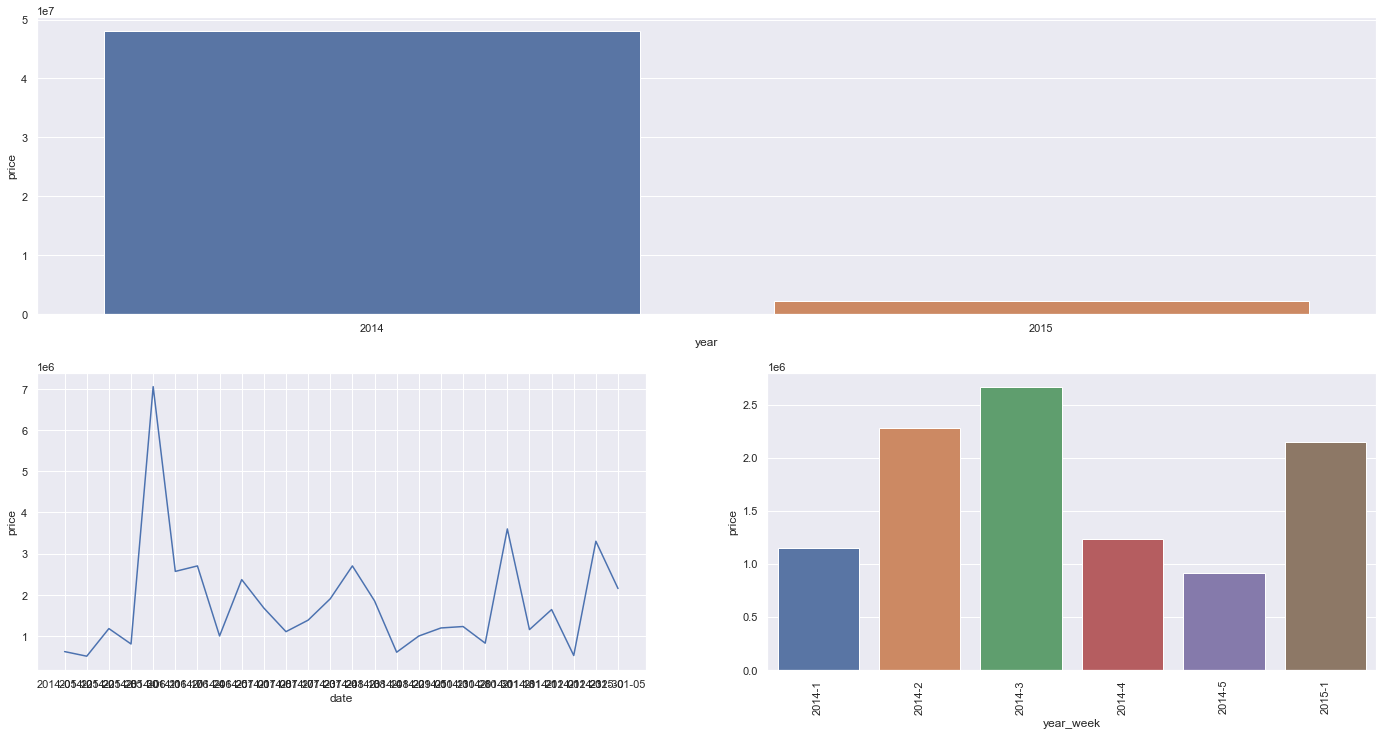

In [108]:
widgets.interactive( update_map, 
                     data = fixed( data ),
                     date_limit = date_limit,
                     year_limit = year_limit,
                     water_limit = water_limit)